In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from matplotlib import rcParams

In [2]:
## plotting variables
fig_dir = '/home/niklas/projects/niche_environments_FIBROSIS/HUMAN_invivo_exvivo_comparison/02_figures/'
plt.rcParams['figure.figsize'] = (6, 5)
plt.rcParams['pdf.fonttype'] = 42

### Read invivo/exvivo results

In [3]:
table_dir = '/home/niklas/projects/niche_environments_FIBROSIS/HUMAN_invivo_exvivo_comparison/01_data/ASK_joint/SCENIC_results/'

In [4]:
## read in vivo regulons
invivo = pd.read_csv(table_dir + 'Macrophages_SCENIC_scores_INVIVO_treatment.csv', index_col=0, sep = ';')
invivo['regulon'] = invivo.index
invivo.columns = ['ILD','healthy','regulon']
invivo.head(5)

,ILD,healthy,regulon
,,,
AHCTF1_(+),0.564341,0.473474,AHCTF1_(+)
AHRR_(+),0.409253,0.379204,AHRR_(+)
ALX1_(+),0.291518,0.284128,ALX1_(+)
ARID3A_(+),0.556824,0.455561,ARID3A_(+)
ARNT_(+),0.582470,0.463001,ARNT_(+)


In [5]:
## read in vivo regulons
exvivo = pd.read_csv(table_dir + 'Macrophages_SCENIC_scores_EXVIVO_treatment.csv', index_col=0, sep = ';')
exvivo['regulon'] = exvivo.index
exvivo.columns = ['FC','CC','regulon']
exvivo.head(5)

,FC,CC,regulon
,,,
ARID3A_(+),0.573194,0.480967,ARID3A_(+)
ARNTL_(+),0.321788,0.292471,ARNTL_(+)
ARNTL2_(+),0.417077,0.408288,ARNTL2_(+)
ASPSCR1_(+),0.287312,0.290055,ASPSCR1_(+)
ATF1_(+),0.540701,0.507598,ATF1_(+)


### merge tables

In [6]:
invivo['invivo_log2FC'] = np.log2(invivo['ILD']/invivo['healthy'])
exvivo['exvivo_log2FC'] = np.log2(exvivo['FC']/exvivo['CC'])

In [7]:
tab = invivo.merge(exvivo, left_on = 'regulon', right_on = 'regulon')

In [8]:
tab

,ILD,healthy,regulon,invivo_log2FC,FC,CC,exvivo_log2FC
0,0.556824,0.455561,ARID3A_(+),0.289577,0.573194,0.480967,0.253086
1,0.556225,0.455283,ARNTL2_(+),0.288905,0.417077,0.408288,0.030727
2,0.574115,0.477004,ATF1_(+),0.267338,0.540701,0.507598,0.091145
3,0.551763,0.471708,ATF2_(+),0.226155,0.546215,0.484855,0.171916
4,0.584153,0.474773,ATF3_(+),0.299108,0.568448,0.492463,0.207013
...,...,...,...,...,...,...,...
254,0.282649,0.282599,ZNF429_(+),0.000255,0.427159,0.390101,0.130925
255,0.193807,0.209050,ZNF441_(+),-0.109227,0.296812,0.241657,0.296589
256,0.213435,0.212502,ZNF467_(+),0.006320,0.562618,0.449171,0.324891
257,0.525824,0.454813,ZNF559_(+),0.209307,0.197372,0.203921,-0.047093


In [9]:
conserved = tab[((tab['invivo_log2FC'] > 0) & (tab['exvivo_log2FC'] > 0)) | ((tab['invivo_log2FC'] < 0) & (tab['exvivo_log2FC'] < 0))]

In [10]:
conserved = conserved.set_index('regulon')

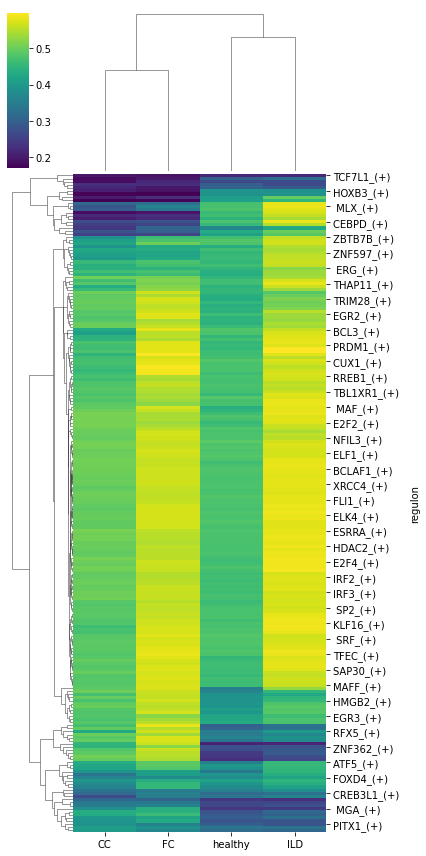

In [11]:
sb.clustermap(conserved[['CC','FC','healthy','ILD']], cmap = 'viridis', figsize = (6,12))

In [12]:
top25_invivo = tab.sort_values(by = 'ILD', ascending = False).head(40)['regulon'].to_list()
bottom25_invivo = tab.sort_values(by = 'healthy', ascending = True).tail(40)['regulon'].to_list()

In [13]:
top25_exvivo = tab.sort_values(by = 'FC', ascending = False).head(40)['regulon'].to_list()
bottom25_exvivo = tab.sort_values(by = 'CC', ascending = True).tail(40)['regulon'].to_list()

In [14]:
top_induced = np.intersect1d(top25_invivo, top25_exvivo)
top_healthy = np.intersect1d(bottom25_invivo, bottom25_exvivo)

In [15]:
induced_tab = tab[tab['regulon'].isin(top_induced)][['regulon','ILD','FC']]
induced_tab

,regulon,ILD,FC
11,BCL11A_(+),0.581564,0.575525
19,CEBPB_(+),0.586707,0.580094
51,ELK4_(+),0.583522,0.570235
97,IRF1_(+),0.582009,0.571535
102,IRF7_(+),0.586588,0.572613
107,JUND_(+),0.585162,0.569394
114,KLF3_(+),0.581484,0.573599
153,NR1H3_(+),0.596018,0.577766
201,SPI1_(+),0.587948,0.570409
205,STAT1_(+),0.597130,0.579938


In [16]:
induced_tab_invivo = induced_tab[['regulon','ILD']]
induced_tab_invivo.rename(columns = {'ILD':'RSS'}, inplace = True)
induced_tab_invivo['condition'] = 'invivo - IPF'
induced_tab_invivo = induced_tab_invivo.sort_values(by = 'RSS', ascending = False)

/home/niklas/miniconda3/envs/niche_fibrosis_env/lib/python3.8/site-packages/pandas/core/frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [17]:
induced_tab_exvivo = induced_tab[['regulon','FC']]
induced_tab_exvivo.rename(columns = {'FC':'RSS'}, inplace = True)
induced_tab_exvivo['condition'] = 'exvivo - FC'

In [18]:
conserved_induced = pd.concat([induced_tab_invivo, induced_tab_exvivo], axis=0)

In [19]:
conserved_induced

,regulon,RSS,condition
205,STAT1_(+),0.597130,invivo - IPF
153,NR1H3_(+),0.596018,invivo - IPF
201,SPI1_(+),0.587948,invivo - IPF
19,CEBPB_(+),0.586707,invivo - IPF
102,IRF7_(+),0.586588,invivo - IPF
107,JUND_(+),0.585162,invivo - IPF
51,ELK4_(+),0.583522,invivo - IPF
226,TFEC_(+),0.582497,invivo - IPF
97,IRF1_(+),0.582009,invivo - IPF
11,BCL11A_(+),0.581564,invivo - IPF


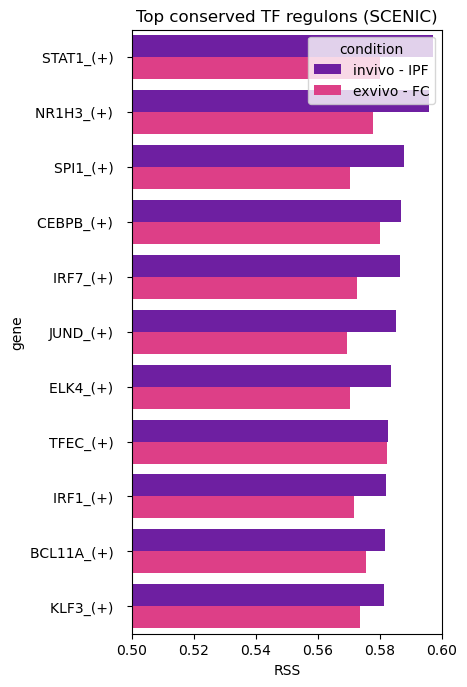

In [20]:
sb.barplot(data = conserved_induced,
           x = 'RSS',
           y = 'regulon',
           hue = 'condition',
           palette = ['#7209b7','#f72585'],
           ax = plt.figure(figsize=(4, 8), dpi = 100).gca()
          ).set(title='Top conserved TF regulons (SCENIC)',
                xlabel = 'RSS',
                ylabel = 'gene',
                xlim = (0.5, 0.6)
               )
plt.savefig(fig_dir + 'barplot_Macrophages_conserved_TF_regulons_IPF.pdf')
plt.show()

In [21]:
bottom_tab = tab[tab['regulon'].isin(top_healthy)][['regulon','healthy','CC']]
bottom_tab

,regulon,healthy,CC
2,ATF1_(+),0.477004,0.507598
5,ATF4_(+),0.488188,0.503962
13,BCLAF1_(+),0.477429,0.502170
32,CTCF_(+),0.478059,0.502230
46,ELF1_(+),0.479216,0.500928
48,ELF4_(+),0.479231,0.503416
55,ESRRA_(+),0.477051,0.510543
103,IRF8_(+),0.481143,0.501862
108,KDM5A_(+),0.482889,0.501134
166,POLR2A_(+),0.475556,0.505577


In [22]:
bottom_tab_invivo = bottom_tab[['regulon','healthy']]
bottom_tab_invivo.rename(columns = {'healthy':'RSS'}, inplace = True)
bottom_tab_invivo['condition'] = 'invivo - healthy'
bottom_tab_invivo = bottom_tab_invivo.sort_values(by = 'RSS', ascending = False)

/home/niklas/miniconda3/envs/niche_fibrosis_env/lib/python3.8/site-packages/pandas/core/frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [23]:
bottom_tab_exvivo = bottom_tab[['regulon','CC']]
bottom_tab_exvivo.rename(columns = {'CC':'RSS'}, inplace = True)
bottom_tab_exvivo['condition'] = 'exvivo - CC'

In [24]:
conserved_repressed = pd.concat([bottom_tab_invivo, bottom_tab_exvivo], axis=0)

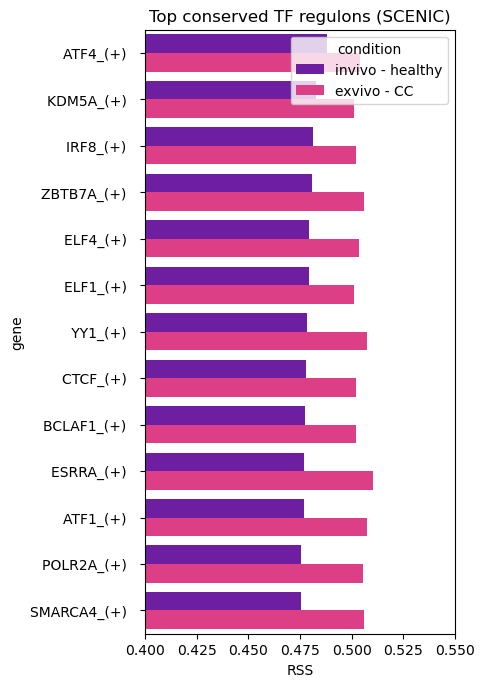

In [25]:
sb.barplot(data = conserved_repressed,
           x = 'RSS',
           y = 'regulon',
           hue = 'condition',
           palette = ['#7209b7','#f72585'],
           ax = plt.figure(figsize=(4, 8), dpi = 100).gca()
          ).set(title='Top conserved TF regulons (SCENIC)',
                xlabel = 'RSS',
                ylabel = 'gene',
                xlim = (0.4,0.55)
               )
plt.savefig(fig_dir + 'barplot_Macrophages_conserved_TF_regulons_healthy.pdf')
plt.show()

### Visualize both plots in one 

In [26]:
conserved_repressed['RSS'] = conserved_repressed['RSS']*(-1)

In [27]:
conserved = pd.concat([conserved_induced, conserved_repressed], axis=0)
conserved

,regulon,RSS,condition
205,STAT1_(+),0.597130,invivo - IPF
153,NR1H3_(+),0.596018,invivo - IPF
201,SPI1_(+),0.587948,invivo - IPF
19,CEBPB_(+),0.586707,invivo - IPF
102,IRF7_(+),0.586588,invivo - IPF
107,JUND_(+),0.585162,invivo - IPF
51,ELK4_(+),0.583522,invivo - IPF
226,TFEC_(+),0.582497,invivo - IPF
97,IRF1_(+),0.582009,invivo - IPF
11,BCL11A_(+),0.581564,invivo - IPF


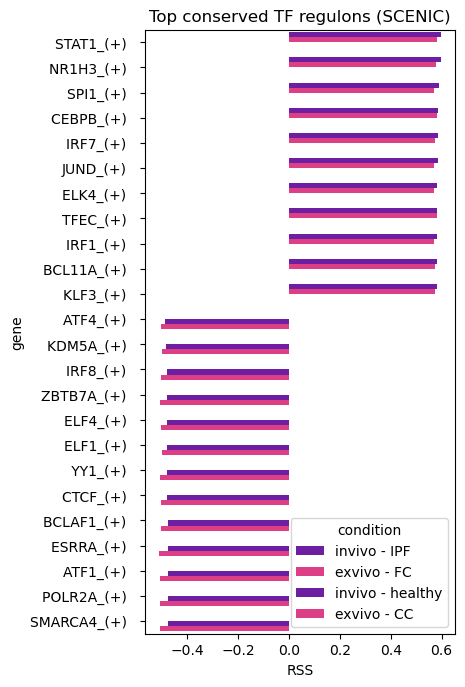

In [28]:
sb.barplot(data = conserved,
           x = 'RSS',
           y = 'regulon',
           hue = 'condition',
           palette = ['#7209b7','#f72585'],
           ax = plt.figure(figsize=(4, 8), dpi = 100).gca()
          ).set(title='Top conserved TF regulons (SCENIC)',
                xlabel = 'RSS',
                ylabel = 'gene'
               )
#plt.savefig(fig_dir + 'barplot_fibroblasts_conserved_TF_regulons_healthy.pdf')
plt.show()